C:\Users\Alexandr\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


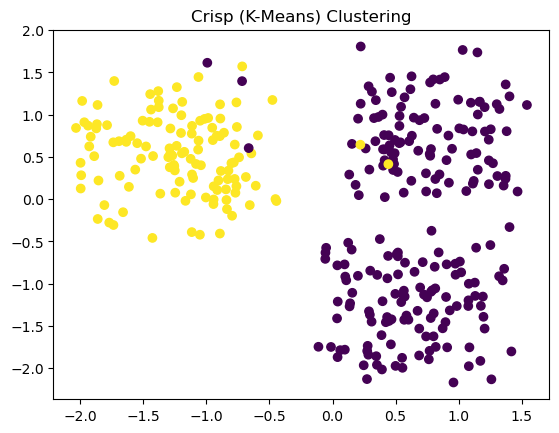

For K-Means, Silhouette Score is: 0.56


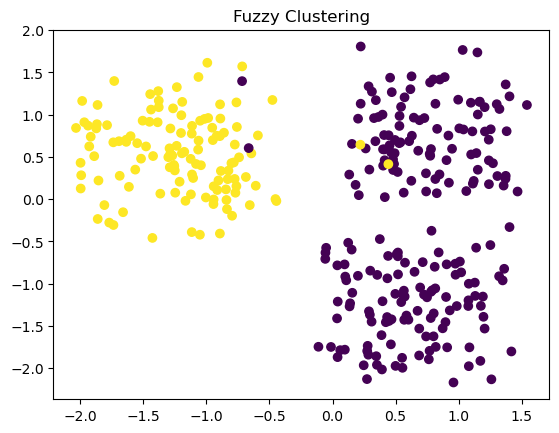

For Fuzzy Clustering, Silhouette Score is: 0.56


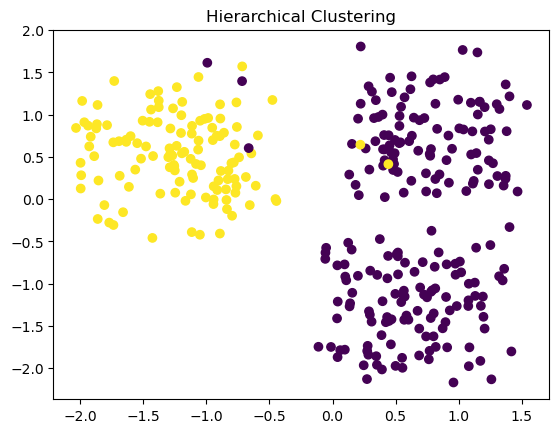

For Hierarchical Clustering, Silhouette Score is: 0.56


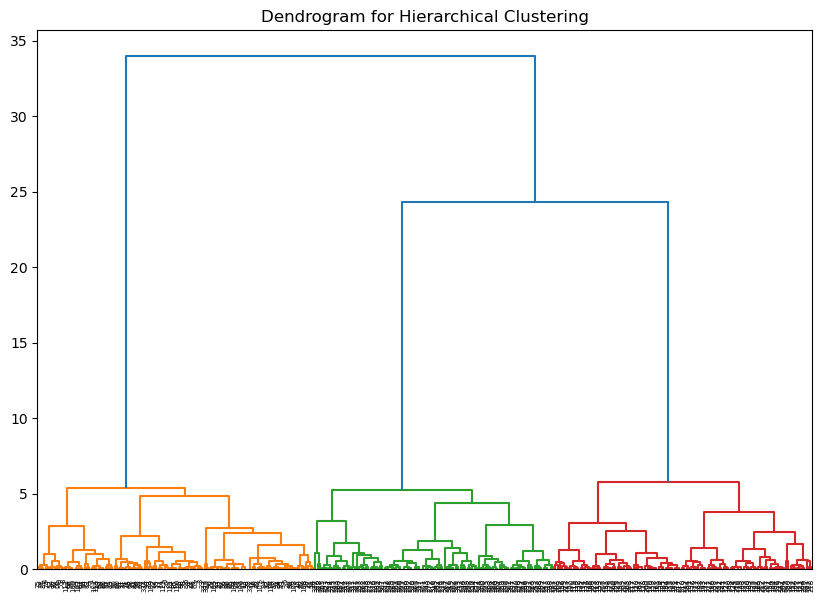

In [12]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Загрузка данных из CSV файла
dataset = pd.read_csv('data.csv')

# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Функция для визуализации кластеров
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()

# 1. Crisp Clustering (жесткая кластеризация) с KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
plot_clusters(scaled_data, kmeans_labels, "Crisp (K-Means) Clustering")

# Расчёт Silhouette Score для K-Means
kmeans_score = silhouette_score(scaled_data, kmeans_labels)
print("For K-Means, Silhouette Score is: {:.2f}".format(kmeans_score))

# 2. Fuzzy Clustering (нечеткая кластеризация)
fcm = FCM(n_clusters=3)
fcm.fit(scaled_data)
fuzzy_labels = fcm.predict(scaled_data)
plot_clusters(scaled_data, fuzzy_labels, "Fuzzy Clustering")

# Расчёт Silhouette Score для Fuzzy Clustering
fuzzy_score = silhouette_score(scaled_data, fuzzy_labels)
print("For Fuzzy Clustering, Silhouette Score is: {:.2f}".format(fuzzy_score))

# 3. Hierarchical Clustering (иерархическая кластеризация)
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_data)
plot_clusters(scaled_data, hierarchical_labels, "Hierarchical Clustering")

# Расчёт Silhouette Score для иерархической кластеризации
hierarchical_score = silhouette_score(scaled_data, hierarchical_labels)
print("For Hierarchical Clustering, Silhouette Score is: {:.2f}".format(hierarchical_score))

# Построение дендрограммы для иерархической кластеризации
linked = linkage(scaled_data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


Silhouette Score:

От 0.71 до 1.0: Очень хорошая кластеризация. Объекты хорошо отделены от соседних кластеров.\
От 0.51 до 0.70: Удовлетворительная кластеризация. Кластеры достаточно хорошо разделены.\
От 0.26 до 0.50: Слабая кластеризация. Объекты имеют некоторую степень смешения между кластерами.\
Меньше 0.25: Кластеры плохо разделены, данные могут принадлежать случайно выбранным группам.\

Таким образом, значение 0.28 означает, что кластеризация имеет небольшую чёткость, и объекты внутри кластеров не очень хорошо отделены от объектов в других кластерах. Это может указывать на следующее:

Данные не очень хорошо поддаются кластеризации с текущими параметрами.\
Возможно, стоит попробовать другое количество кластеров.\
Также может помочь выбрать другие характеристики для кластеризации или применить другой алгоритм.\
Можно попробовать изменить количество кластеров (например, 2, 4 или 5), чтобы увидеть, улучшится ли результат.